In [109]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<Figure size 7200x4800 with 0 Axes>

In [110]:
#import the dataset with pandas
df = pd.read_excel('salary_data_states.xlsx')

In [111]:
df

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",SOFTWARE ENGINEER,BLOOMINGTON,None,Nothing,n,...,"Software Developers, Applications",Illinois,IL,Unknown,y,H-1B,0.00,62171.00,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,...,"Business Teachers, Postsecondary",California,CA,94132.0,n,greencard,0.00,91440.00,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,SPECIAL EDUCATION TEACHER,LOS ANGELES,None,Nothing,n,...,"Special Education Teachers, Kindergarten and E...",California,CA,Unknown,y,H-1B,0.00,49470.00,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,SCIENCE TEACHER,HARLINGEN CISD,None,Nothing,n,...,"Biological Science Teachers, Postsecondary",Texas,TX,Unknown,y,H-1B,0.00,43800.00,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,SENIOR SOFTWARE ENGINEER,PORTLAND,None,Nothing,n,...,"Software Developers, Systems Software",Oregon,OR,Unknown,y,E-3 Australian,0.00,170000.00,software engineer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167273,I-200-12241-209885,certified-withdrawn,8/28/2012,6/6/2013,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",MIDDLE SCHOOL TEACHERS,SAIPAN,None,Nothing,n,...,"Middle School Teachers, Except Special and Car...",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,11648.00,teacher,167357
167274,I-200-11305-143547,denied,11/1/2011,11/3/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167358
167275,I-200-11313-833007,certified,11/9/2011,11/16/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",TEACHER,SAIPAN,None,Nothing,n,...,"Teachers and Instructors, All Other*",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10920.00,teacher,167359
167276,I-200-11312-798611,denied,11/8/2011,11/15/2011,"CHINESE BIBLE CHURCH INTERNATIONAL, INC.",PRESCHOOL TEACHER,SAIPAN,None,Nothing,n,...,"Preschool Teachers, Except Special Education",Northern Mariana Islands,MP,Unknown,y,H-1B,10504.00,10608.00,teacher,167360


In [112]:
# df.JOB_TITLE_SUBGROUP.unique()
df.WORK_STATE_ABBREVIATION.unique()

array(['IL', 'CA', 'TX', 'OR', 'NJ', 'NY', 'CT', 'WA', 'MD', 'NC', 'DC',
       'SC', 'RI', 'CO', 'MI', 'MO', 'MN', 'WY', 'LA', 'PA', 'TN', 'ID',
       'MA', 'NE', 'GA', 'OH', 'FL', 'IN', 'AZ', 'KY', 'IA', 'WI', 'AL',
       'AR', 'VA', 'NM', 'WV', 'OK', 'UT', 'NV', 'MS', 'NH', 'DE', 'KS',
       'AK', 'HI', 'VT', 'ND', 'ME', 'MT', 'VI', 'SD', 'GU', 'PR', 'PW',
       'MP'], dtype=object)

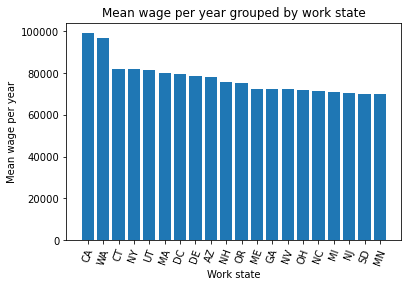

In [113]:
# Question 2
# What states (of those I am willing to move to) have the highest paying data-related salaries?
# States I am willing to move to = CA , NY, FL
states_list = ['CA','NY','FL']

df1 = pd.DataFrame(df[(df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("WORK_STATE_ABBREVIATION")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False).head(20)).reset_index()
plt.bar('WORK_STATE_ABBREVIATION', 'PAID_WAGE_PER_YEAR', data=df1)
plt.title('Mean wage per year grouped by work state')
plt.xlabel('Work state')
plt.ylabel('Mean wage per year')
plt.xticks(rotation = 70)

plt.savefig('question2.png', bbox_inches='tight', dpi=1200)

In [114]:
# 2.1 Differences between job sub-categories?
df[(df['WORK_STATE_ABBREVIATION'].isin(states_list)) & (df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("JOB_TITLE_SUBGROUP")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

JOB_TITLE_SUBGROUP
data scientist   108021.04
data analyst      76241.03
Name: PAID_WAGE_PER_YEAR, dtype: float64

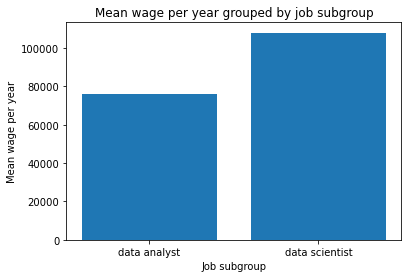

In [115]:
df2 = pd.DataFrame(df[(df['WORK_STATE_ABBREVIATION'].isin(states_list)) & (df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("JOB_TITLE_SUBGROUP")['PAID_WAGE_PER_YEAR'].mean()).reset_index()
plt.bar('JOB_TITLE_SUBGROUP', 'PAID_WAGE_PER_YEAR', data=df2)
plt.title('Mean wage per year grouped by job subgroup')
plt.xlabel('Job subgroup')
plt.ylabel('Mean wage per year')

plt.savefig('question2_1.png', bbox_inches='tight', dpi=1200)

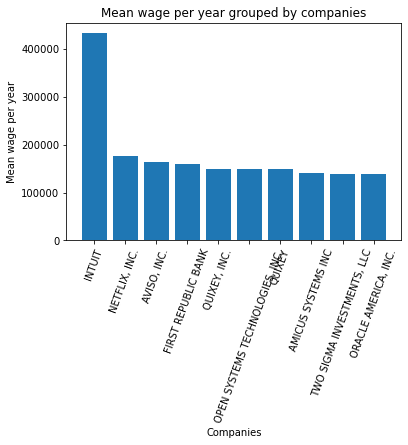

In [116]:
# 2.2 Which companies have the highest salaries for those sub-types?
df3 = pd.DataFrame(df[(df['WORK_STATE_ABBREVIATION'].isin(states_list)) & (df.JOB_TITLE_SUBGROUP == "data analyst")].groupby("EMPLOYER_NAME")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False).head(10)).reset_index()
plt.bar('EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', data=df3)
plt.title('Mean wage per year grouped by companies')
plt.xlabel('Companies')
plt.ylabel('Mean wage per year')
plt.xticks(rotation = 70)

plt.savefig('question2_2_analyst.png', bbox_inches='tight', dpi=1200)

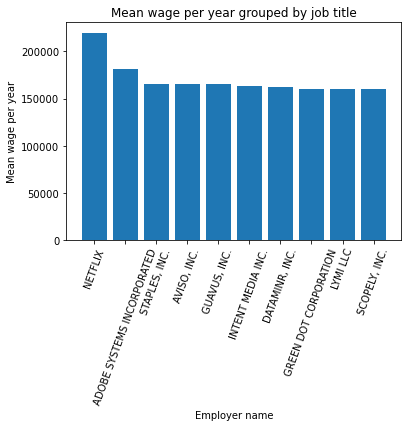

In [117]:
df4 = pd.DataFrame(df[(df['WORK_STATE_ABBREVIATION'].isin(states_list)) & (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("EMPLOYER_NAME")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False).head(10)).reset_index()
plt.bar('EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', data=df4)
plt.title('Mean wage per year grouped by job title')
plt.xlabel('Employer name')
plt.ylabel('Mean wage per year')
plt.xticks(rotation = 70)

plt.savefig('question2_2_scientist.png', bbox_inches='tight', dpi=1200)

In [118]:
# 2.3 Will the answer change if I take standard of living into account?
# referred data: https://taxfoundation.org/real-value-100-state-2019/
# CA = 87,11$ / NY = 86,36$ / FL = 100,10$
# multiplied by worth of 100$ in the state!
df[(df['WORK_STATE_ABBREVIATION'] == "CA") & (df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("JOB_TITLE_SUBGROUP")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

JOB_TITLE_SUBGROUP
data scientist   108021.04
data analyst      80470.05
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [119]:
standard_of_living_data_scientist = 108021.04*0.8711
standard_of_living_data_analyst = 80470.05*0.8711
print(standard_of_living_data_scientist)
print(standard_of_living_data_analyst)

94097.12794399999
70097.460555


In [120]:
df[(df['WORK_STATE_ABBREVIATION'] == "NY") & (df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("JOB_TITLE_SUBGROUP")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

JOB_TITLE_SUBGROUP
data scientist   108021.04
data analyst      71449.00
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [121]:
standard_of_living_data_scientist = 108021.04*0.8636
standard_of_living_data_analyst = 71449.00*0.8636
print(standard_of_living_data_scientist)
print(standard_of_living_data_analyst)

93286.97014399999
61703.356400000004


In [122]:
df[(df['WORK_STATE_ABBREVIATION'] == "FL") & (df.JOB_TITLE_SUBGROUP == "data analyst") | (df.JOB_TITLE_SUBGROUP == "data scientist")].groupby("JOB_TITLE_SUBGROUP")['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

JOB_TITLE_SUBGROUP
data scientist   108021.04
data analyst      61632.05
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [123]:
standard_of_living_data_scientist = 108021.04*1.0010
standard_of_living_data_analyst = 61632.05*1.0010
print(standard_of_living_data_scientist)
print(standard_of_living_data_analyst)

108129.06103999999
61693.682049999996
